### Example on how to implement KMeans and PCA using the sklearn library ###

In [1]:
# Import necessary libraries
from sklearn.datasets import load_wine

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
wine = load_wine() # load and assign the data set to the variable wine
df = pd.DataFrame(data=wine['data'], columns=wine['feature_names']) # Create a DataFrame of the features of the wine dataset
y = wine.target # The label, althouh we do not need it for unsuperwised learnin, is stored as wine.target for visualization 

print(f"DataFrame of features of content of wine:\n{df.head()}\n\nThe target / label column denoting the quality:\n{y}\n\nShape of df is: {df.shape}")

DataFrame of features of content of wine:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_di

#### PCA for Visualization ####

Let us reduce this multi-dimensional data and visualize it

In [3]:
# Always Scale the data before using PCA
# Apply it to the features

scaler = StandardScaler() # Create an instance of the StandardScaler object
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns) # create a new df out of the existing one, but scaled

print(f"Scaled DataFrame:\n\n{df_scaled}") # Display the scaled DataFrame

Scaled DataFrame:

      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1     

In [4]:
# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2,random_state=42) # Create an instance of the PCA object, reducing the dimensions to 2
principalComponents = pca.fit_transform(df_scaled) # Takes the scaled data and applies PCA to it to reduce the dimensions to 2
print(principalComponents.shape) # Display the shape of the reduced dimensions

(178, 2)


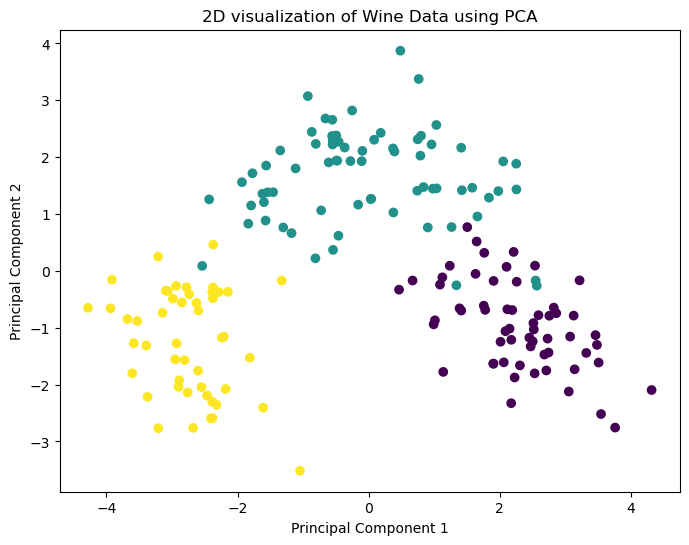

In [5]:
# Now we can Visualize the 2D projection of the data
# Give the data points the color of the label column (remember that this won't be available in real world data)
# You will see the three groups of wines based on quality

plt.figure(figsize=(8,6)) # Set the size of the plot
plt.scatter(principalComponents[:,0], principalComponents[:,1], c=wine['target']) # Give the data points the color of the label
plt.xlabel('Principal Component 1') # Label the x-axis
plt.ylabel('Principal Component 2') # Label the y-axis
plt.title('2D visualization of Wine Data using PCA') # Title of the plot
plt.show() # Display the plot

#### PCA - Checking the variance explained by each principal component and plotting the Explained Cummulative Variance chart ####

In [6]:
# Let us create a PCA object to explain 100% variance
pca_all = PCA(n_components=13,random_state=42) # Need all the compoenents to explain 100% variance (all the features)
principalComponents_all = pca_all.fit_transform(df_scaled) # Ft transform the original scaled dataset
print(f"Explained variance ratios:\n{pca_all.explained_variance_ratio_}") # The explained variance is accessible as a method from the PCA object we created
# If you add up all the explained variance ratios, you will get 1.0

Explained variance ratios:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


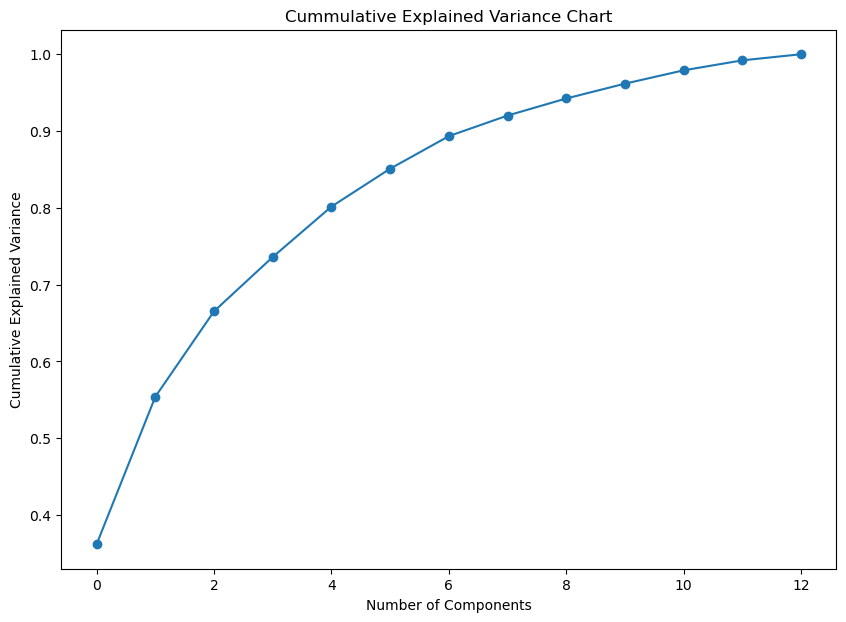

In [7]:
# Plotting the cummulative variance chart

plt.figure(figsize=(10, 7)) # Set the size of the plot
plt.plot(np.cumsum(pca_all.explained_variance_ratio_), marker='o') # this line generates the values for the cummulative sum
plt.title('Cummulative Explained Variance Chart')
plt.xlabel('Number of Components') # Label the x-axis
plt.ylabel('Cumulative Explained Variance') # Label the y-axis
plt.show()# Check how many components are enough for explaining 90% variance
# Based on the graph, it seems that 7 components are enough to explain 90% variance
# The following block of code will determine the exact number of components needed to explain 90% variance

In [8]:
# Check how many components are there upto the point where explained variance becomes > 0.9
# We use the np.where command for this and it will give us the index of the values > 0.9
# We are interested in the first value in that index list as that is the staring point for values > 0.9
# We add one to that number as the count in python starts from 0

print(np.where(np.cumsum(pca_all.explained_variance_ratio_) > 0.9)) # This will give us the index of the values > 0.9
print(f"Number of Components which explain the variance in the data upto 90%: {np.where(np.cumsum(pca_all.explained_variance_ratio_) > 0.9)[0][0]+1}") # This will give us the number of components needed to explain 90% variance, and we get the first index of the array ([0][0]) and then add one to it because that is how we count it in the normal world

(array([ 7,  8,  9, 10, 11, 12]),)
Number of Components which explain the variance in the data upto 90%: 8


#### KMEANS algorithm example ####

In [9]:
# Apply K-Means clustering on the scaled dataset
# Since it seems like there are 3 clusters, let us assume k=3
# We work on the original scaled data

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled) # Fit model on original scaled data to generate 3 cluster centers (centroids) and cluster numbers to the data points
print(f"These are the n-dimensional coordinates of the 3 centroids:\n{kmeans.cluster_centers_}") # gives us the coordinates of the 3 cluster centers (centroids)
print(f"These are the cluster number each data point belongs to:\n\n{kmeans.labels_}") # gives us the cluster number each data point belongs to

These are the n-dimensional coordinates of the 3 centroids:
[[-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]]
These are the cluster number each data point belongs to:

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### It will be interesting to see if the color groups we got with the PCA visualization are the same as the clusters found by kmeans ####

To do that, we simply use the kmeans.labels to color the data points and check it out. it should find almost exactly the same clusters.

This goes on to show us that even if we did not have the label information, kmeans would have found the clusters. That is the power of the clustering algorithm.

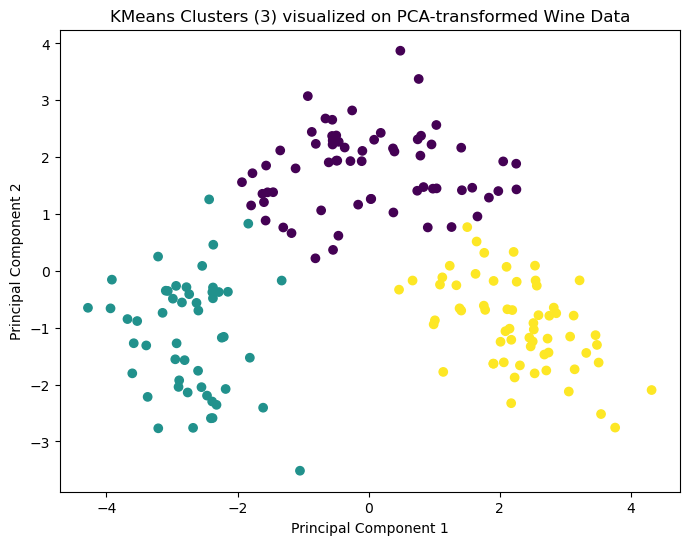

In [10]:
# Visualize the PCA-transformed data with KMeans labels
plt.figure(figsize=(8,6)) # Set the size of the plot
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=kmeans.labels_) # Give the data points the color of the cluster number
plt.xlabel('Principal Component 1') # Label the x-axis
plt.ylabel('Principal Component 2') # Label the y-axis
plt.title('KMeans Clusters (3) visualized on PCA-transformed Wine Data') # Title of the plot
plt.show() # Display the plot